In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataC=pd.read_csv('concrete_data.csv')
dataC.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
dataC.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
dataC.shape

(1030, 9)

In [5]:
dataC.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
target = "Strength"
Xdata = dataC.copy()
Ydata = Xdata.pop(target)

In [7]:
Xdata.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
Ydata.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [9]:
# number of predictors
n_cols      = Xdata.shape[1]
input_shape = (n_cols,)

PART A

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [11]:
from tensorflow import keras as K
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input

/Users/ahmetefeersoy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
input_layer = Input(shape=(8,))  
hidden_layer = Dense(10, activation='relu')(input_layer)
output_layer = Dense(1)(hidden_layer) 
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
# model architecture
model_architecture1 = {"layer_1": {"n_units": 10, "activation": "relu"},
                       "layer_2": {"n_units":  1},
                      }

print()
print("input_shape    = {}".format(input_shape))
print("network_config = {}".format(model_architecture1))
print()


input_shape    = (8,)
network_config = {'layer_1': {'n_units': 10, 'activation': 'relu'}, 'layer_2': {'n_units': 1}}



In [14]:
mse_list = []
seed=340
for i in range(50):
    # Split data into training and test sets
    seed = seed+ i*2
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.3,random_state=seed)
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate mean and standard deviation of mean squared errors
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

print("Mean of Mean Squared Errors:", mean_mse)
print("Standard Deviation of Mean Squared Errors:", std_mse)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
10/10 ━━━━━━━━━━━

In [15]:
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_mse], "std_sq_mse": [std_mse]})
df_results


,Part,mean_sq_mse,std_sq_mse
0,A,73.12693,40.165066


PART B

In [16]:
X_normalized = (Xdata - Xdata.mean()) / Xdata.std()
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_normalized.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Users/ahmetefeersoy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
mse_list1 = []

# Repeat steps 1-5 for 50 iterations
seed = 3400
for i in range(50):
    # Split data into training and test sets
    seed = seed + i * 2
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, Ydata, test_size=0.3, random_state=seed)
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list1.append(mse)

# Calculate mean and standard deviation of mean squared errors
mean_mse1 = np.mean(mse_list1)
std_mse1 = np.std(mse_list1)

print("Mean of Mean Squared Errors:", mean_mse1)
print("Standard Deviation of Mean Squared Errors:", std_mse1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
10/10 ━━━━━━━━━━━

In [18]:

df_results.loc[df_results.shape[0]] = ["B",mean_mse1,std_mse1]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,73.12693,40.165066
1,B,57.90147,51.864647


PART C

In [19]:
X_normalized = (Xdata - Xdata.mean()) / Xdata.std()
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_normalized.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

/Users/ahmetefeersoy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
mse_list2 = []

# Repeat steps 1-5 for 50 iterations
seed = 3400
for i in range(50):
    # Split data into training and test sets
    seed = seed + i * 2
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, Ydata, test_size=0.3, random_state=seed)
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list2.append(mse)

# Calculate mean and standard deviation of mean squared errors
mean_mse2 = np.mean(mse_list2)
std_mse2 = np.std(mse_list2)

print("Mean of Mean Squared Errors:", mean_mse2)
print("Standard Deviation of Mean Squared Errors:", std_mse2)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
10/10 ━━━━━━━━━━━

In [21]:
df_results.loc[df_results.shape[0]] = ["C",mean_mse2,std_mse2]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,73.126930,40.165066
1,B,57.901470,51.864647
2,C,38.088319,21.874493


PART D

In [22]:
input_layer = Input(shape=(8,))  
hidden_layer1 = Dense(10, activation='relu')(input_layer)
hidden_layer2 = Dense(10, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(10, activation='relu')(hidden_layer2)
output_layer = Dense(1)(hidden_layer3) 
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
mse_list3 = []
seed=3400
for i in range(50):
    # Split data into training and test sets
    seed = seed+ i*2
    X_train, X_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.3,random_state=seed)
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list3.append(mse)

# Calculate mean and standard deviation of mean squared errors
mean_mse3 = np.mean(mse_list3)
std_mse3 = np.std(mse_list3)

print("Mean of Mean Squared Errors:", mean_mse3)
print("Standard Deviation of Mean Squared Errors:", std_mse3)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step
10/10 ━━━━━━━━━━━

In [24]:
df_results.loc[df_results.shape[0]] = ["D",mean_mse3,std_mse3]
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,73.126930,40.165066
1,B,57.901470,51.864647
2,C,38.088319,21.874493
3,D,39.890638,15.081298


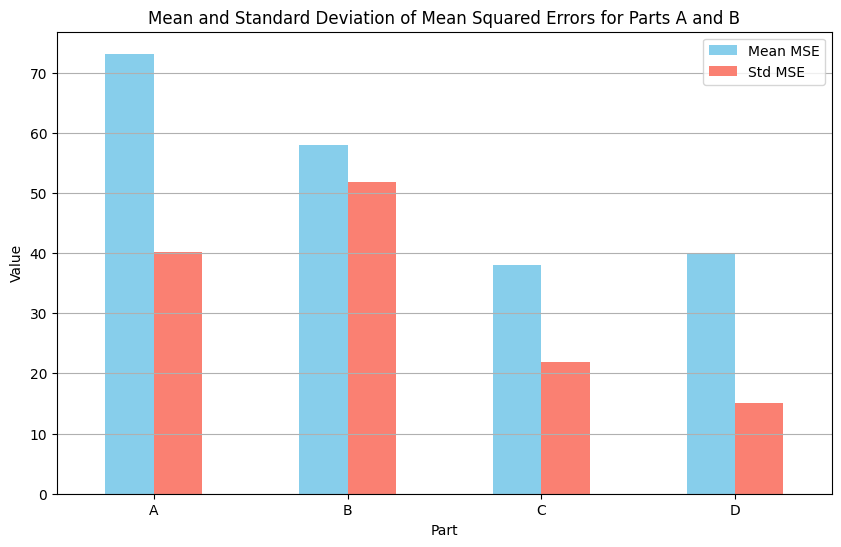

In [25]:
import matplotlib.pyplot as plt

df_resultsPlot=df_results

df_resultsPlot.set_index("Part", inplace=True)

df_resultsPlot.plot(kind="bar", y=["mean_sq_mse", "std_sq_mse"], rot=0, figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Mean and Standard Deviation of Mean Squared Errors for Parts A and B")
plt.xlabel("Part")
plt.ylabel("Value")
plt.legend(["Mean MSE", "Std MSE"])
plt.grid(axis="y")
plt.show()


Part A shows the highest MSE and standard deviation, indicating less stable and less accurate performance.

Part C achieves the lowest MSE and standard deviation, suggesting that a longer training period improves model performance.

Part B and D show intermediate results, with Part B slightly better than Part D in terms of standard deviation.

These differences highlight the impact of training duration, normalization, and evaluation methods on the performance of neural network models. The iterative training and evaluation approach used in Parts B, C, and D provides a more reliable measure of model performance compared to the single evaluation in Part A.